# <center>Project of Machine Learning</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*TO GRANT OR NOT TO GRANT: DECIDING ON COMPENSATION BENEFITS*</center>

<center>
Group 17 <br>
Diogo Ruivo, 20240584  <br>
José Tiago, 20240582  <br>
Matilde Miguel, 20240549  <br>
Nuno Sousa, 20222125  <br>
Rafael Lopes, 20240588  <br>



    
</center>
ter>

** **

## Project Description     
This project addresses the task of automating decisions on compensation in insurance claims related to workplace injuries. Using historical data from the New York WCB, our objective is to predict the type of compensation a claim will be awarded, thereby optimizing the decision-making process and improving consistency in outcomes.   

This project aims to build a robust predictive model to classify injury claims in a multiclass classification scenario, explore and optimize model performance through preprocessing techniques and hyperparameter tuning and provide interpretative analysis to identify the most influential variables in the final decision.   

Prior studies show that machine learning techniques, such as random forests and XGBoost, have proven effective in automating decision-making processes in insurance. Our work builds on these approaches, exploring multiple variables related to demographics and injury types to create an interpretable and reliable decision-making model.


## Table of Contents
* [1.Import Libraries](#importlibraries)
* [2.Import Dataset](#importdataset)
* [3.Initial Analysis](#initialanalysis)
    * [3.1 Further Analysis](#furtheranalysis)
        * [3.1.1 Graphical Representaion](#graphicalrepresentaion)
* [4. Data Pre-Processing](#datapreprocessing)
    * [4.1 Types](#types)
    * [4.2 Duplicates](#duplicates)
    * [4.3 Missing Values](#missingvalues)
        * [4.3.1 Accident Date](#accidentdate)
        * [4.3.2 Average Weekly Wage](#averageweeklywage)
        * [4.3.3 Birth Year](#birthyear)
        * [4.3.4 C-2 Date](#C-2Date)
        * [4.3.5 C-3 Date](#C-3Date)
        * [4.3.6 First Hearing Date](#firsthearingdate)
        * [4.3.7 IME-4 Count](#IME-4Count)
        * [4.3.8 Zip Code](#zipcode)
        * [4.3.9 Replacing NaN with nearest neighbor](#nearestneighbor)
    * [4.4 Outliers](#outliers)
        * [4.4.1 Age at Injury](#outageatinjury)
        * [4.3.2 Birth Year](#outbirthyear)
        * [4.3.3 Average Weekly Wage](#outaverageweeklywage)
    * [4.5 Data Partition](#datapartition)
    * [4.6 Categorical Columns as Numerical](#categorical)
    * [4.7 Scaling](#scaling)
* [5. Feature selection](#featureselection)
    * [5.1 Correlations](#correlations)
    * [5.2 Chi-Square](#chisquare)
    * [5.3 LassoCV](#lassocv)
    * [5.4 Balancing Data](#balancingdata)
* [6. Build a simple model and assess the performance](#simplemodel)
    * [6.1 Creating the model](#creating)
    * [6.2 Evaluate the model](#evaluate)
    * [6.3 Export the predictor](#export)

<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import libraries
    
</a>

In [88]:
#!pip install missingno
#!pip install xgboost

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#data partition
from sklearn.model_selection import train_test_split

#empty values
import missingno as msno
from sklearn.impute import KNNImputer

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency, spearmanr

#wrapper methods
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
 
# embedded methods
from sklearn.linear_model import LassoCV

#
from math import ceil

#scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder,  OrdinalEncoder

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, cross_val_score
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report, confusion_matrix

from imblearn.over_sampling import ADASYN

#model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import Dataset
    
</a>

In [4]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_38456\2467044942.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('train_data.csv')


<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>

In [5]:
train.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


In [6]:
test.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.00,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.00,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
5,2022-12-28,36,N,2023-01-02,N,0.00,1986.0,2023-01-02,NaN,NYC TRANSIT AUTHORITY,...,III,NaN,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,77.0,MENTAL STRESS,66.0,NO PHYSICAL INJURY,10941,4
6,2022-12-22,19,N,2023-01-02,N,688.20,2003.0,2022-12-30,NaN,"WAL-MART ASSOCIATES, INC.",...,I,NaN,56.0,LIFTING,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14131,6
7,2022-12-13,43,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,ERIE INSURANCE CO OF NY,...,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,49.0,SPRAIN OR TEAR,53.0,KNEE,13357,4
8,2022-12-28,40,N,2023-01-02,N,0.00,1982.0,2022-12-31,NaN,STARR INDEMNITY & LIABILITY CO,...,IV,NaN,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),11735,3
9,2022-11-01,48,N,2023-01-02,Y,1180.74,1974.0,2023-01-02,2023-01-09,STATE INSURANCE FUND,...,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14720,0


In [7]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 33)
Test dimensions: (387975, 30)


In [8]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)

Train columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')
Test columns: Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [11]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,...,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,...,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,...,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,...,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,...,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,...,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,...,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,...,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,...,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


In [12]:
test.describe(include = 'all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
count,385531,387975.000000,387975,387975,387975,3.687710e+05,368505.000000,378841,85216,387975,...,387975,0.0,377627.000000,377627,377415.000000,377415,378426.000000,378426,368633,387975.000000
unique,3438,NaN,3,434,2,NaN,NaN,1048,626,1598,...,5,NaN,NaN,74,NaN,56,NaN,51,6276,NaN
top,2024-01-16,NaN,N,2023-09-21,N,NaN,NaN,2023-10-11,2023-10-04,STATE INSURANCE FUND,...,IV,NaN,NaN,"FELLOW WORKER, PATIENT OR OTHER PERSON",NaN,STRAIN OR TEAR,NaN,MULTIPLE,11368,NaN
freq,1263,NaN,386314,1789,306476,NaN,NaN,1687,341,66189,...,182276,NaN,NaN,33293,NaN,108326,NaN,67465,2068,NaN
mean,NaN,41.414944,NaN,NaN,NaN,1.833438e+02,1875.383466,NaN,NaN,NaN,...,NaN,NaN,53.335678,NaN,38.373674,NaN,31.516109,NaN,NaN,3.000284
std,NaN,14.501056,NaN,NaN,NaN,3.542310e+03,444.659075,NaN,NaN,NaN,...,NaN,NaN,26.176833,NaN,20.966100,NaN,23.359950,NaN,NaN,1.997982
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,0.000000e+00,1967.000000,NaN,NaN,NaN,...,NaN,NaN,29.000000,NaN,10.000000,NaN,15.000000,NaN,NaN,1.000000
50%,NaN,40.000000,NaN,NaN,NaN,0.000000e+00,1980.000000,NaN,NaN,NaN,...,NaN,NaN,56.000000,NaN,43.000000,NaN,36.000000,NaN,NaN,3.000000
75%,NaN,53.000000,NaN,NaN,NaN,0.000000e+00,1992.000000,NaN,NaN,NaN,...,NaN,NaN,74.000000,NaN,52.000000,NaN,51.000000,NaN,NaN,5.000000


<hr>
<a class="anchor" id="furtheranalysis">
    
## 3.1 Further Analysis
    
</a>

In [13]:
print('youngest person:',train['Birth Year'].max())
print('oldest injured:',train['Age at Injury'].max())
print('most dependents:',train['Number of Dependents'].max())

youngest person: 2018.0
oldest injured: 117.0
most dependents: 6.0


In [14]:
for i in train.columns:
    print(i)
    print(train[i].unique())
    print(train[i].value_counts())
    print('\n')

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     

<hr>
<a class="anchor" id="graphicalrepresentaion">
    
### 3.1.1 Graphical Representaion
    
</a>

In [15]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()

In [16]:
"""train[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()"""

'train[numerical_cols].hist(figsize=(15, 10))\nplt.tight_layout()\nplt.show()'

In [17]:
"""plt.figure(figsize=(8, 6))
sns.countplot( x= 'Claim Injury Type Num', data = train)
plt.title('Distribution of Claim Injury Type Num')
plt.show()"""

"plt.figure(figsize=(8, 6))\nsns.countplot( x= 'Claim Injury Type Num', data = train)\nplt.title('Distribution of Claim Injury Type Num')\nplt.show()"

In [18]:
"""for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()"""

"for col in categorical_cols:\n    plt.figure(figsize=(10, 5))\n    sns.countplot(data=train, x=col, order=train[col].value_counts().index)\n    plt.xticks(rotation=90)\n    plt.title(f'Distribution of {col}')\n    plt.show()"

In [19]:
"""corr_matrix = train[numerical_cols + ['Claim Injury Type Num']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show("""

'corr_matrix = train[numerical_cols + [\'Claim Injury Type Num\']].corr()\n\nplt.figure(figsize=(12, 8))\nsns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=\'coolwarm\')\nplt.title(\'Correlation Matrix\')\nplt.show('

In [20]:
"""for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Claim Injury Type Num', y=col, data=train)
    plt.title(f'{col} vs Claim Injury Type Num')
    plt.show() """

"for col in numerical_cols:\n    plt.figure(figsize=(10, 6))\n    sns.boxplot(x='Claim Injury Type Num', y=col, data=train)\n    plt.title(f'{col} vs Claim Injury Type Num')\n    plt.show() "

<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Data Pre-Processing
    
</a>

In [21]:
# set Claim Identifier as index
train.set_index('Claim Identifier', inplace=True) 
test.set_index('Claim Identifier', inplace=True)

<hr>
<a class="anchor" id="types">
    
## 4.1 Types
    
</a>

In [22]:
#Because we had a negative value (-9) that isn't in the given table about the WCIO Part Of Body Code and his Description we change this value to 0
train['WCIO Part Of Body Code'] = train['WCIO Part Of Body Code'].apply(lambda x: 0 if x < 0 else x)
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].apply(lambda x: 0 if x < 0 else x)

In [97]:
# Convert:
## IN DATE
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'] 
for col in date_cols:
    train[col] = pd.to_datetime(train[col], errors='coerce')
    test[col] = pd.to_datetime(test[col], errors='coerce')

# IN INT
int_cols = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents']
for col in int_cols:
    train[col] = train[col].astype('Int64')
    test[col] = test[col].astype('Int64')

# IN INT, AND THEN PASS IT TO OBJECT 
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
train[float_to_object] = train[float_to_object].astype('Int64')
test[float_to_object] = test[float_to_object].astype('Int64')

NameError: name 'train' is not defined

In [24]:
# classifiy them as Non-US residents
train['Zip Code'] = train['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)
test['Zip Code'] = test['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)

In [25]:
#zip codes that start with 1 come from NY state - where the data set is based
# we decide to divide those that are from NY from those that even though are US residents, are not from NY
train['Zip Code'] = np.where(
    (train['Zip Code'] != 'Unknown') & 
    (train['Zip Code'] != 'Non-US Resident') & 
    train['Zip Code'].notna() & 
    train['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (train['Zip Code'] != 'Unknown') & 
        (train['Zip Code'] != 'Non-US Resident') & 
        train['Zip Code'].notna(), 
        'non-NY US Residents', 
        train['Zip Code']
    )
)
test['Zip Code'] = np.where(
    (test['Zip Code'] != 'Unknown') & 
    (test['Zip Code'] != 'Non-US Resident') & 
    test['Zip Code'].notna() & 
    test['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (test['Zip Code'] != 'Unknown') & 
        (test['Zip Code'] != 'Non-US Resident') & 
        test['Zip Code'].notna(), 
        'non-NY US Residents', 
        test['Zip Code']
    )
)


print(train['Zip Code'].value_counts())
print() 
print('NaN:', train['Zip Code'].isna().sum())

Zip Code
NY Resident            503921
non-NY US Residents     26094
Non-US Resident         15374
Name: count, dtype: int64

NaN: 48082


<hr>
<a class="anchor" id="duplicates">
    
## 4.2 Duplicates
    
</a>

In [26]:
print(train.duplicated().sum())
print(test.duplicated().sum())

train.drop_duplicates(inplace=True)
#test.drop_duplicates(inplace=True)

print(train.duplicated().sum())
#print(test.duplicated().sum())

18355
3
0


<hr>
<a class="anchor" id="missingvalues">
    
## 4.3 Missing Values
    
</a>

In [99]:
msno.matrix(train, labels=True, sort="descending");

NameError: name 'train' is not defined

In [28]:
train.isna().sum()

Accident Date                           4784
Age at Injury                           1096
Alternative Dispute Resolution          1096
Assembly Date                              0
Attorney/Representative                 1096
Average Weekly Wage                    29747
Birth Year                             30174
C-2 Date                               15655
C-3 Date                              387872
Carrier Name                            1096
Carrier Type                            1096
Claim Injury Type                       1096
County of Injury                        1096
COVID-19 Indicator                      1096
District Name                           1096
First Hearing Date                    424319
Gender                                  1096
IME-4 Count                           442313
Industry Code                          11053
Industry Code Description              11053
Medical Fee Region                      1096
OIICS Nature of Injury Description    575116
WCIO Cause

In [101]:
msno.matrix(test, labels=True, sort="descending");

NameError: name 'test' is not defined

In [30]:
test.isna().sum()

Accident Date                           2444
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    19204
Birth Year                             19470
C-2 Date                                9134
C-3 Date                              302759
Carrier Name                               0
Carrier Type                               0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    344947
Gender                                     0
IME-4 Count                           352726
Industry Code                           7736
Industry Code Description               7736
Medical Fee Region                         0
OIICS Nature of Injury Description    387975
WCIO Cause of Injury Code              10348
WCIO Cause

In [31]:
# Delete the column with all missing values
not_in_test = train[['WCB Decision', 'Agreement Reached']]
train.drop(['OIICS Nature of Injury Description', 'WCB Decision', 'Agreement Reached'], inplace=True, axis=1)
test.drop(['OIICS Nature of Injury Description'], inplace=True, axis=1)

In [32]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (575116, 29)
Test dimensions: (387975, 28)


In [33]:
# Eliminates the lines that do not have a WCB decision
train.dropna(subset=['Claim Injury Type'], inplace=True)

In [103]:
# Eliminates rows with only 1, 2 or 3 NaN values, as we see that 
# the 'C-3 Date', 'First Hearing Date' and 'IME-4 Count' columns have +- 70% of the values ​​missing
train = train.dropna(thresh=4)

NameError: name 'train' is not defined

In [35]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (574020, 29)
Test dimensions: (387975, 28)


In [36]:
train.isna().sum()

Accident Date                          3688
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14559
C-3 Date                             386776
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423223
Gender                                    0
IME-4 Count                          441217
Industry Code                          9957
Industry Code Description              9957
Medical Fee Region                        0
WCIO Cause of Injury Code             15639
WCIO Cause of Injury Description

In [37]:
test.isna().sum()

Accident Date                          2444
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
C-2 Date                               9134
C-3 Date                             302759
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344947
Gender                                    0
IME-4 Count                          352726
Industry Code                          7736
Industry Code Description              7736
Medical Fee Region                        0
WCIO Cause of Injury Code             10348
WCIO Cause of Injury Description      10348
WCIO Nature of Injury Code      

In [38]:
# median
# for metric columns
# fill with training median as it does not get influenced by extreme outliers
def NaN_median (train, test, cols):
    """
    Replace NaN values ​​with the training median in specific columns (cols is a list) of a DataFrame (df).
    """
    for col in cols:
        if pd.api.types.is_numeric_dtype(train[col]): # Numeric
            median_to_fill = train[col].median()
            train[col].fillna(median_to_fill, inplace=True)
            test[col].fillna(median_to_fill, inplace=True)
            # print(df[col].isna().sum())
            
        elif pd.api.types.is_datetime64_any_dtype(train[col]):  # Date  
            median_date_to_fill = train[col].median() 
            train[col].fillna(median_date_to_fill, inplace=True)
            test[col].fillna(median_date_to_fill, inplace=True) 
            # print(df[col].isna().sum())
            
    return train, test

In [39]:
#for non-metric columns
#replace NaN with Unknown
def NaN_Unknown(df, cols):
    """
    Replace NaN values with  'Unknown' (for object columns)
                              0 (for numeric columns) 
                             '1900-01-01'(generic date, for date columns)
    in specific columns (cols is a list) of a DataFrame (df).
    This function skips columns of type datetime.
    """
    for col in cols:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna('Unknown')
            # print(df[col].isna().sum())
       
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(0)
            # print(df[col].isna().sum())
        
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(pd.to_datetime('1900-01-01'))
            # print(df[col].isna().sum())
            
    return df

In [ ]:
def preprocess_dates(df, date_columns):
    df = df.copy()
    print(f"Initial shape: {df.shape}")
    
    for col in date_columns:
        df[f'{col}_numeric'] = (df[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')
        
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_dayofweek'] = df[col].dt.dayofweek
    
    df['Assembly_to_Accident'] = (df['Assembly Date'] - df['Accident Date']).dt.days
    df['C2_to_Accident'] = (df['C-2 Date'] - df['Accident Date']).dt.days
    df['C3_to_Accident'] = (df['C-3 Date'] - df['Accident Date']).dt.days
    df['Hearing_to_Accident'] = (df['First Hearing Date'] - df['Accident Date']).dt.days
    
    df = df.drop(columns=date_columns)
    
    print(f"Shape after date processing: {df.shape}")
    return df

In [41]:
def create_feature_sets(df, feature_set='basic'):
    df = df.copy()
    
    if feature_set == 'basic':
        return df
    
    if 'Age at Injury' in df.columns:
        df['Age_Group'] = pd.qcut(
            df['Age at Injury'].fillna(df['Age at Injury'].median()),
            q=5, 
            labels=['VeryYoung', 'Young', 'Middle', 'Old', 'VeryOld']
        )
    
    if 'Average Weekly Wage' in df.columns:
        df['Wage_Group'] = pd.qcut(
            df['Average Weekly Wage'].fillna(df['Average Weekly Wage'].median()),
            q=5,
            labels=['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh']
        )
    
    if feature_set in ['interactions', 'full']:
        df['Carrier_Industry'] = df['Carrier Type'].astype(str) + '_' + df['Industry Code'].astype(str)
        df['District_County'] = df['District Name'].astype(str) + '_' + df['County of Injury'].astype(str)
        
        for col in df.columns:
            if df[col].isnull().sum() > 0:
                df[f'{col}_missing'] = df[col].isnull().astype(int)
    
    return df

In [42]:
def run_preprocessing_pipeline(train_df, test_df,
                             feature_set='basic'
                             ):
    print("\nStarting preprocessing pipeline:")
    print(f"Feature set: {feature_set}")
    
    date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
    
    print("\nProcessing dates...")
    train_df = preprocess_dates(train_df, date_cols)
    test_df = preprocess_dates(test_df, date_cols)
    
    print("\nCreating features...")
    train_df = create_feature_sets(train_df, feature_set)
    test_df = create_feature_sets(test_df, feature_set)
    
    
    print("\nPreprocessing complete!")
    print("Train shape:", train_df.shape)
    print("Test shape:", test_df.shape)
    
    return train_df, test_df

<hr>
<a class="anchor" id="accidentdate">
    
### 4.3.1 Accident Date
    
</a>
Replace NaN values with the median

In [43]:
NaN_median(train, test, ['Accident Date'])

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="averageweeklywage">
    
### 4.3.2 Average Weekly Wage 
    
</a> 
Replace NaN values with the median 

In [105]:
NaN_median(train, test, ['Average Weekly Wage'])

NameError: name 'NaN_median' is not defined

<hr>
<a class="anchor" id="birthyear">
    
### 4.3.3 Birth Year 
    
</a>   

In [45]:
# Replace 0 values ​​with NaN
train['Birth Year'].replace(0, np.nan, inplace=True)
test['Birth Year'].replace(0, np.nan, inplace=True)

# Replace NaN values with subtracting the Accident Year by the Age at Injury 
train['Accident Year'] = train['Accident Date'].dt.year
train['Birth_Year_2'] = train['Accident Year'] - train['Age at Injury']
train['Birth Year'] = train['Birth Year'].fillna(train['Birth_Year_2'])

test['Accident Year'] = test['Accident Date'].dt.year
test['Birth_Year_2'] = test['Accident Year'] - test['Age at Injury']
test['Birth Year'] = test['Birth Year'].fillna(test['Birth_Year_2'])

#print(train['Birth Year'].isna().sum())
#print(test['Birth Year'].isna().sum())

# The rest of the missing values ​​were filled in with the median
NaN_median(train, test, ['Birth Year'])

#print(train['Birth Year'].isna().sum())
#print(test['Birth Year'].isna().sum())

train.drop(columns=['Accident Year', 'Birth_Year_2'], inplace=True)
test.drop(columns=['Accident Year', 'Birth_Year_2'], inplace=True)

<hr>
<a class="anchor" id="C-2Date">
    
### 4.3.4 C-2 Date
    
</a>   
Replace NaN values with the median  

In [46]:
NaN_median(train, test, ['C-2 Date'])

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="C-3Date">
    
### 4.3.5 C-3 Date
    
</a>   
Replace NaN values with the median

In [47]:
#train.drop(columns=['C-3 Date'], inplace=True)
#test.drop(columns=['C-3 Date'], inplace=True)

NaN_median(train, test, ['C-3 Date'])

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="firsthearingdate">
    
### 4.3.6 First Hearing Date 
    
</a>     
A blank date means the claim has not yet had a hearing held  <br>
Replace NaN values with the median

In [48]:
# train['First Hearing Date'] = train['First Hearing Date'].fillna('No Hearing Set')

NaN_median(train, test, ['First Hearing Date'])

(                 Accident Date  Age at Injury Alternative Dispute Resolution  \
 Claim Identifier                                                               
 5393875             2019-12-30             31                              N   
 5393091             2019-08-30             46                              N   
 5393889             2019-12-06             40                              N   
 5393887             2019-12-30             61                              N   
 5393863             2019-12-26             67                              N   
 ...                        ...            ...                            ...   
 6165265             2022-12-14             35                              N   
 6165285             2022-12-15             33                              N   
 6165506             2022-12-13             61                              N   
 6165339             2022-12-14             24                              N   
 6165075             2022-12

<hr>
<a class="anchor" id="IME-4Count">
    
### 4.3.7 IME-4 Count
    
</a>        
Replace NaN values with 0, because if it doesn't have a value it's because they haven't carried out any independent medical examination yet

In [49]:
train['IME-4 Count'] = train['IME-4 Count'].fillna(0)
test['IME-4 Count'] = test['IME-4 Count'].fillna(0)

<hr>
<a class="anchor" id="zipcode">
    
### 4.3.8 Zip Code
    
</a>  
Replace NaN values with the mode

In [50]:
train['Zip Code'] = train['Zip Code'].fillna('NY Resident')
test['Zip Code'] = test['Zip Code'].fillna('NY Resident')

<hr>
<a class="anchor" id="nearestneighbor">
    
### 4.3.9 Replacing NaN with nearest neighbor
    
</a>  

+ Industry Code (Industry Code Description)
+ WCIO Cause of Injury Code (WCIO Cause of Injury Description)
+ WCIO Nature of Injury Code (WCIO Nature of Injury Description)
+ WCIO Part Of Body Code (WCIO Part Of Body Description)

In [53]:
map_industry = train.dropna(subset=['Industry Code', 'Industry Code Description']).set_index('Industry Code')['Industry Code Description'].to_dict()
map_cause = train.dropna(subset=['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']).set_index('WCIO Cause of Injury Code')['WCIO Cause of Injury Description'].to_dict()
map_nature = train.dropna(subset=['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']).set_index('WCIO Nature of Injury Code')['WCIO Nature of Injury Description'].to_dict()
map_body = train.dropna(subset=['WCIO Part Of Body Code', 'WCIO Part Of Body Description']).set_index('WCIO Part Of Body Code')['WCIO Part Of Body Description'].to_dict()

{44: 'RETAIL TRADE',
 23: 'CONSTRUCTION',
 56: 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT',
 62: 'HEALTH CARE AND SOCIAL ASSISTANCE',
 72: 'ACCOMMODATION AND FOOD SERVICES',
 61: 'EDUCATIONAL SERVICES',
 51: 'INFORMATION',
 31: 'MANUFACTURING',
 48: 'TRANSPORTATION AND WAREHOUSING',
 45: 'RETAIL TRADE',
 42: 'WHOLESALE TRADE',
 53: 'REAL ESTATE AND RENTAL AND LEASING',
 52: 'FINANCE AND INSURANCE',
 49: 'TRANSPORTATION AND WAREHOUSING',
 81: 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)',
 92: 'PUBLIC ADMINISTRATION',
 33: 'MANUFACTURING',
 54: 'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
 32: 'MANUFACTURING',
 71: 'ARTS, ENTERTAINMENT, AND RECREATION',
 22: 'UTILITIES',
 11: 'AGRICULTURE, FORESTRY, FISHING AND HUNTING',
 21: 'MINING',
 55: 'MANAGEMENT OF COMPANIES AND ENTERPRISES'}

In [54]:
train_num = train.select_dtypes(include=[np.number])
test_num = test.select_dtypes(include=[np.number])
train_cat = train.select_dtypes(include=['object'])
test_cat = test.select_dtypes(include=['object'])

In [ ]:
imputer = KNNImputer(n_neighbors=1).fit(train_num)
train_num_imp = imputer.transform(train_num)
test_num_imp = imputer.transform(test_num)

array([[3.10000e+01, 0.00000e+00, 1.98800e+03, ..., 1.00000e+01,
        6.20000e+01, 1.00000e+00],
       [4.60000e+01, 1.74593e+03, 1.97300e+03, ..., 4.90000e+01,
        3.80000e+01, 4.00000e+00],
       [4.00000e+01, 1.43480e+03, 1.97900e+03, ..., 7.00000e+00,
        1.00000e+01, 6.00000e+00],
       ...,
       [6.10000e+01, 9.91080e+02, 1.96100e+03, ..., 8.00000e+01,
        3.40000e+01, 3.00000e+00],
       [2.40000e+01, 0.00000e+00, 1.99800e+03, ..., 5.90000e+01,
        5.50000e+01, 5.00000e+00],
       [7.20000e+01, 0.00000e+00, 1.95000e+03, ..., 9.00000e+01,
        0.00000e+00, 3.00000e+00]])

In [ ]:
train_num_df = pd.DataFrame(train_num_imp, columns=train_num.columns, index=train_num.index)
test_num_df = pd.DataFrame(test_num_imp, columns=test_num.columns, index=test_num.index)

train_combined = pd.concat([train_num_df, train_cat], axis=1)
test_combined = pd.concat([test_num_df, test_cat], axis=1)

train.update(train_combined)
test.update(test_combined)

In [57]:
train['Industry Code Description'] = train['Industry Code'].map(map_industry).fillna(train['Industry Code Description'])
train['WCIO Cause of Injury Description'] = train['WCIO Cause of Injury Code'].map(map_cause).fillna(train['WCIO Cause of Injury Description'])
train['WCIO Nature of Injury Description'] = train['WCIO Nature of Injury Code'].map(map_nature).fillna(train['WCIO Nature of Injury Description'])
train['WCIO Part Of Body Description'] = train['WCIO Part Of Body Code'].map(map_body).fillna(train['WCIO Part Of Body Description'])

In [ ]:
test['Industry Code Description'] = test['Industry Code'].map(map_industry).fillna(test['Industry Code Description'])
test['WCIO Cause of Injury Description'] = test['WCIO Cause of Injury Code'].map(map_cause).fillna(test['WCIO Cause of Injury Description'])
test['WCIO Nature of Injury Description'] = test['WCIO Nature of Injury Code'].map(map_nature).fillna(test['WCIO Nature of Injury Description'])
test['WCIO Part Of Body Description'] = test['WCIO Part Of Body Code'].map(map_body).fillna(test['WCIO Part Of Body Description'])

In [58]:
train[float_to_object] = train[float_to_object].astype('object')
test[float_to_object] = test[float_to_object].astype('object')

In [59]:
train.isna().sum()

Accident Date                            0
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                      0
Birth Year                               0
C-2 Date                                 0
C-3 Date                                 0
Carrier Name                             0
Carrier Type                             0
Claim Injury Type                        0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                       0
Gender                                   0
IME-4 Count                              0
Industry Code                         9957
Industry Code Description             9957
Medical Fee Region                       0
WCIO Cause of Injury Code            15639
WCIO Cause of Injury Description     15639
WCIO Nature

In [61]:
msno.matrix(train, labels=True, sort="descending");

In [60]:
test.isna().sum()

Accident Date                            0
Age at Injury                            0
Alternative Dispute Resolution           0
Assembly Date                            0
Attorney/Representative                  0
Average Weekly Wage                      0
Birth Year                               0
C-2 Date                                 0
C-3 Date                                 0
Carrier Name                             0
Carrier Type                             0
County of Injury                         0
COVID-19 Indicator                       0
District Name                            0
First Hearing Date                       0
Gender                                   0
IME-4 Count                              0
Industry Code                         7736
Industry Code Description             7736
Medical Fee Region                       0
WCIO Cause of Injury Code            10348
WCIO Cause of Injury Description     10348
WCIO Nature of Injury Code           10560
WCIO Nature

In [62]:
msno.matrix(test, labels=True, sort="descending");

In [111]:
train, test = run_preprocessing_pipeline(train, test)

NameError: name 'run_preprocessing_pipeline' is not defined

<hr>
<a class="anchor" id="outliers">
    
## 4.4 Outliers
    
</a>

In [66]:
numeric_cols = train[['Age at Injury',
                      'Average Weekly Wage',
                      'Birth Year',
                      'IME-4 Count',
                      'Number of Dependents']]

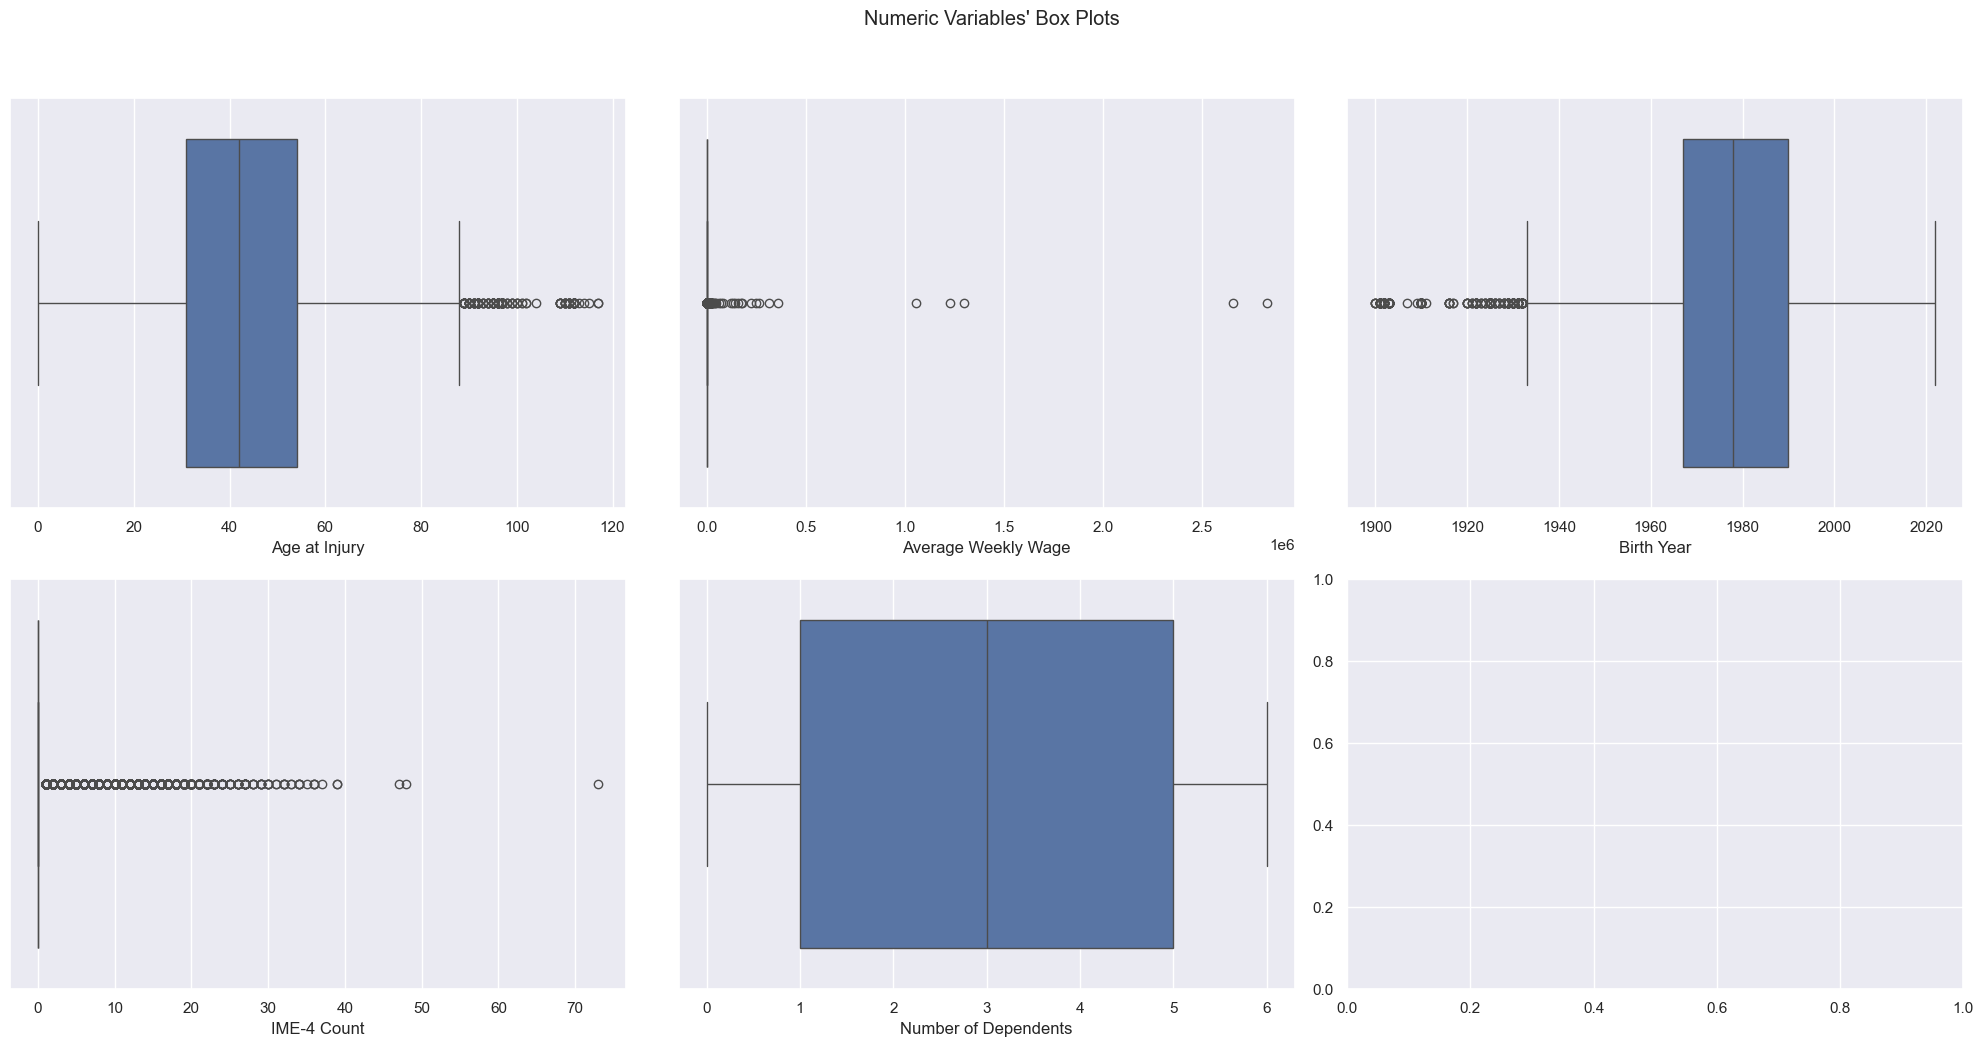

In [67]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_cols.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numeric_cols.columns): # Notice the zip() function and flatten() method
    sns.boxplot(x=numeric_cols[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

Age at injury: some outliers    
Average Weekly Wage: understandable because we have many volunteers   
Birth Year: the same as age at injury, because we use age at injury to correct birth year     
IME-4 Count: some outliers     
Number of dependents: all good

In [69]:
# Function to calculate IQR and identify outliers for a specific column
def identify_outliers_iqr_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

<hr>
<a class="anchor" id="outageatinjury">
    
### 4.4.1 Age at Injury
    
</a>

In [70]:
outliers_train = identify_outliers_iqr_column(train, 'Age at Injury')
outliers_aligned_train = outliers_train.reindex(train.index, fill_value=False)
print(f"Number of outliers in 'Age at Injury': {outliers_train.sum()}")
train_data_cleaned_age = train[~outliers_aligned_train]

Number of outliers in 'Age at Injury': 197
Number of outliers in 'Birth Year': 162


<hr>
<a class="anchor" id="outbirthyear">
    
### 4.4.2 Birth Year
    
</a>

In [ ]:
outliers_train = identify_outliers_iqr_column(train_data_cleaned_age, 'Birth Year')
outliers_aligned_train = outliers_train.reindex(train_data_cleaned_age.index, fill_value=False)
print(f"Number of outliers in 'Birth Year': {outliers_train.sum()}")
train_data_cleaned_birth = train_data_cleaned_age[~outliers_aligned_train]

<hr>
<a class="anchor" id="outaverageweeklywage">
    
### 4.4.3 Average Weekly Wage
    
</a>
1/3 are non-voluntary, so the majority is voluntary <br>        
Decided to consider outlier just the outliers of the non-voluntary workers, using the formula below

In [71]:
not_voluntary_train = train_data_cleaned_birth[train_data_cleaned_birth['Average Weekly Wage'] != 0]

In [72]:
# Identify outliers for the 'Average Weekly Wage' column
outliers_train = identify_outliers_iqr_column(not_voluntary_train, 'Average Weekly Wage')

# Align the index of the outliers Series with X_train_num
outliers_aligned_train = outliers_train.reindex(train_data_cleaned_birth.index, fill_value=False)

# Print the number of outliers in the 'Average Weekly Wage' column
print(f"Number of outliers in 'Average Weekly Wage': {outliers_train.sum()}")

# Remove outliers from the 'Average Weekly Wage' column
train_data_cleaned = train_data_cleaned_birth[~outliers_aligned_train]

# Verify the cleaned DataFrame
print(train.shape)
print("Shape after removing outliers:", train_data_cleaned.shape)

Number of outliers in 'Average Weekly Wage': 6000
(574020, 48)
Shape after removing outliers: (567661, 48)


<hr>
<a class="anchor" id="datapartition">
    
## 4.5 Data Partition
    
</a>

In [74]:
X = train_data_cleaned.drop(['Claim Injury Type'], axis = 1)
y = train_data_cleaned['Claim Injury Type']

# X_train, X_val, y_train, y_val = train_test_split(X,y, 
#                                                   test_size = 0.3, 
#                                                   random_state = 0, 
#                                                   stratify = y, 
#                                                   shuffle = True)

### Rafa
X_train, X_val,y_train, y_val = train_test_split(X,y,
                                                train_size = 0.7,
                                                random_state=0,
                                                shuffle = True, 
                                                stratify = y)

# For train
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

# For Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

# For test
X_test_num = test.select_dtypes(include=np.number).set_index(test.index)
X_test_cat = test.select_dtypes(exclude=np.number).set_index(test.index)

<hr>
<a class="anchor" id="categorical">
    
## 4.6 Categorical Columns as Numerical
</a>

In [75]:
# Convert all categorical columns to strings
X_train_cat = X_train_cat.astype(str)
X_val_cat = X_val_cat.astype(str)
X_test_cat = X_test_cat.astype(str)

enc1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_cat_lab = enc1.fit_transform(X_train_cat)
X_val_cat_lab = enc1.transform(X_val_cat)
X_test_cat_lab = enc1.transform(X_test_cat)
#X_train_cat_lab

array([[   0.,    0., 1642., ...,   24.,   12.,    0.],
       [   0.,    0., 1240., ...,   42.,   24.,    0.],
       [   0.,    0., 1761., ...,   32.,    6.,    0.],
       ...,
       [   0.,    0.,  323., ...,   26.,   39.,    0.],
       [   0.,    0., 1509., ...,   23.,   15.,    0.],
       [   0.,    0., 1402., ...,    6.,   36.,    0.]])

In [76]:
X_train_cat_df = pd.DataFrame(X_train_cat_lab, columns=X_train_cat.columns, index=X_train_cat.index)
#X_train_cat_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,
5891449,0.0,0.0,1642.0,1.0,0.0,0.0,0.0,1.0,18.0,5.0,0.0,76.0,49.0,21.0,44.0,24.0,12.0,0.0
6049360,0.0,0.0,1240.0,2.0,23.0,0.0,4.0,1.0,10.0,17.0,3.0,20.0,20.0,25.0,51.0,42.0,24.0,0.0
5944798,0.0,0.0,1761.0,3.0,11.0,0.0,1.0,1.0,19.0,7.0,0.0,66.0,52.0,30.0,4.0,32.0,6.0,0.0
5983607,0.0,0.0,1642.0,1.0,2.0,0.0,4.0,1.0,19.0,7.0,3.0,55.0,43.0,1.0,16.0,0.0,28.0,0.0
5531560,0.0,1.0,1642.0,1.0,2.0,0.0,4.0,1.0,19.0,7.0,3.0,50.0,22.0,25.0,51.0,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939352,0.0,0.0,1480.0,3.0,14.0,0.0,2.0,0.0,19.0,7.0,0.0,10.0,16.0,18.0,33.0,5.0,10.0,0.0
6134352,0.0,1.0,969.0,0.0,51.0,0.0,3.0,1.0,12.0,8.0,3.0,7.0,30.0,25.0,51.0,27.0,53.0,0.0
5628788,0.0,0.0,323.0,0.0,51.0,0.0,3.0,1.0,20.0,3.0,2.0,36.0,35.0,25.0,51.0,26.0,39.0,0.0


In [77]:
X_val_cat_df = pd.DataFrame(X_val_cat_lab, columns=X_val_cat.columns, index=X_val_cat.index)
#X_val_cat_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,
6165218,0.0,1.0,596.0,3.0,23.0,0.0,4.0,1.0,11.0,17.0,3.0,76.0,49.0,24.0,50.0,41.0,20.0,0.0
5566638,0.0,0.0,1642.0,1.0,40.0,0.0,4.0,1.0,3.0,4.0,3.0,14.0,26.0,25.0,51.0,29.0,48.0,0.0
5428596,0.0,0.0,69.0,0.0,58.0,0.0,0.0,0.0,19.0,7.0,4.0,35.0,31.0,25.0,51.0,30.0,23.0,2.0
5589742,0.0,0.0,165.0,2.0,40.0,0.0,4.0,1.0,18.0,5.0,3.0,3.0,44.0,1.0,16.0,23.0,15.0,0.0
5806319,0.0,0.0,1642.0,1.0,60.0,0.0,4.0,2.0,19.0,7.0,2.0,46.0,61.0,1.0,16.0,45.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546723,0.0,0.0,1642.0,1.0,35.0,0.0,0.0,0.0,19.0,7.0,1.0,50.0,22.0,25.0,51.0,30.0,23.0,0.0
5404705,0.0,1.0,1109.0,2.0,60.0,0.0,4.0,1.0,18.0,5.0,4.0,8.0,43.0,21.0,44.0,23.0,15.0,2.0
6024629,0.0,0.0,1642.0,1.0,33.0,0.0,7.0,0.0,19.0,7.0,1.0,51.0,21.0,25.0,51.0,23.0,15.0,0.0


In [78]:
X_test_cat_df = pd.DataFrame(X_test_cat_lab, columns=X_test_cat.columns, index=X_test_cat.index)
#X_test_cat_df

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code
Claim Identifier,,,,,,,,,,,,,,,,,,
6165911,0.0,0.0,859.0,0.0,2.0,0.0,4.0,1.0,10.0,17.0,3.0,20.0,20.0,1.0,16.0,42.0,24.0,0.0
6166141,0.0,0.0,1.0,0.0,40.0,0.0,4.0,0.0,9.0,16.0,3.0,51.0,21.0,1.0,16.0,1.0,30.0,0.0
6165907,0.0,0.0,73.0,0.0,60.0,0.0,4.0,0.0,17.0,1.0,2.0,46.0,61.0,24.0,50.0,49.0,5.0,0.0
6166047,0.0,0.0,858.0,0.0,40.0,0.0,4.0,0.0,10.0,17.0,3.0,13.0,25.0,1.0,16.0,41.0,20.0,0.0
6166102,0.0,0.0,1148.0,0.0,23.0,0.0,4.0,1.0,16.0,9.0,3.0,55.0,43.0,18.0,33.0,25.0,44.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,0.0,0.0,1642.0,1.0,22.0,0.0,7.0,1.0,24.0,20.0,0.0,77.0,74.0,56.0,56.0,57.0,54.0,0.0
6553119,0.0,1.0,1240.0,2.0,51.0,0.0,3.0,0.0,24.0,20.0,3.0,77.0,74.0,56.0,56.0,57.0,54.0,0.0
6553542,0.0,1.0,1642.0,1.0,40.0,0.0,4.0,1.0,24.0,20.0,3.0,77.0,74.0,56.0,56.0,57.0,54.0,0.0


In [79]:
enc2 = LabelEncoder() #encoder for labels
y_train = enc2.fit_transform(y_train)
y_val = enc2.transform(y_val)

In [80]:
y_train, y_val

(array([1, 1, 2, ..., 1, 2, 1]), array([2, 3, 1, ..., 1, 1, 3]))

<hr>
<a class="anchor" id="scaling">
    
## 4.7 Scaling
    
</a>

In [81]:
scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, index=X_train_num.index, columns=X_train_num.columns)
#X_train_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_numeric,Accident Date_year,Accident Date_month,Accident Date_dayofweek,Assembly Date_numeric,...,C-3 Date_month,C-3 Date_dayofweek,First Hearing Date_numeric,First Hearing Date_year,First Hearing Date_month,First Hearing Date_dayofweek,Assembly_to_Accident,C2_to_Accident,C3_to_Accident,Hearing_to_Accident
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5891449,0.579545,0.000000,0.426966,0.0,0.833333,0.970073,0.964912,1.000000,0.000000,0.671233,...,0.545455,0.333333,0.483323,0.5,0.181818,0.50,0.045061,0.308086,0.161936,0.031091
6049360,0.659091,0.000000,0.348315,0.0,0.500000,0.980112,0.982456,0.545455,1.000000,0.858447,...,0.545455,0.333333,0.483323,0.5,0.181818,0.50,0.044869,0.307947,0.153262,0.021063
5944798,0.636364,0.000000,0.359551,0.0,0.333333,0.969064,0.964912,1.000000,0.000000,0.735160,...,0.545455,0.333333,0.483323,0.5,0.181818,0.50,0.049433,0.311253,0.162807,0.032099
5983607,0.295455,0.000000,0.707865,0.0,0.500000,0.976173,0.982456,0.363636,0.166667,0.780822,...,0.545455,0.333333,0.483323,0.5,0.181818,0.50,0.044725,0.307842,0.156665,0.024998
5531560,0.375000,0.591889,0.606742,0.0,0.500000,0.944709,0.947368,0.545455,0.666667,0.198174,...,0.636364,0.666667,0.205160,0.0,1.000000,0.25,0.045542,0.308434,0.169987,0.035217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939352,0.625000,0.000000,0.382022,0.0,0.500000,0.973483,0.982456,0.181818,0.166667,0.728767,...,0.545455,0.333333,0.483323,0.5,0.181818,0.50,0.044677,0.307807,0.158989,0.027684
6134352,0.590909,0.656584,0.415730,0.0,0.500000,0.984628,0.982456,0.818182,0.333333,0.959817,...,0.909091,0.333333,0.483323,0.5,0.181818,0.50,0.045686,0.308747,0.169115,0.016553
5628788,0.250000,0.000000,0.730337,0.0,0.166667,0.952635,0.947368,1.000000,0.166667,0.336986,...,0.545455,0.333333,0.483323,0.5,0.181818,0.50,0.044917,0.307981,0.177000,0.048508


In [82]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, index=X_val_num.index, columns=X_val_num.columns)
#X_val_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_numeric,Accident Date_year,Accident Date_month,Accident Date_dayofweek,Assembly Date_numeric,...,C-3 Date_month,C-3 Date_dayofweek,First Hearing Date_numeric,First Hearing Date_year,First Hearing Date_month,First Hearing Date_dayofweek,Assembly_to_Accident,C2_to_Accident,C3_to_Accident,Hearing_to_Accident
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165218,0.590909,0.000000,0.415730,0.000000,1.000000,0.985060,0.982456,0.909091,0.666667,0.999087,...,0.000000,0.333333,0.765261,0.75,0.363636,0.50,0.047319,0.309722,0.171066,0.037616
5566638,0.636364,0.705116,0.337079,0.000000,0.333333,0.947927,0.947368,0.727273,0.166667,0.244749,...,0.545455,0.333333,0.483323,0.50,0.181818,0.50,0.044773,0.307877,0.181067,0.053210
5428596,0.238636,0.000000,0.741573,0.000000,0.000000,0.936494,0.947368,0.000000,0.166667,0.040183,...,0.545455,0.333333,0.483323,0.50,0.181818,0.50,0.045446,0.308330,0.190945,0.064629
5589742,0.284091,0.000000,0.696629,0.000000,0.833333,0.948552,0.947368,0.818182,0.000000,0.277626,...,0.545455,0.333333,0.483323,0.50,0.181818,0.50,0.045878,0.308608,0.180528,0.052586
5806319,0.681818,0.788404,0.303371,0.000000,1.000000,0.964740,0.964912,0.727273,0.166667,0.562557,...,0.545455,0.333333,0.413468,0.25,0.909091,0.75,0.044677,0.307807,0.166542,0.031091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546723,0.534091,0.414591,0.438202,0.000000,0.500000,0.946246,0.947368,0.636364,0.166667,0.218265,...,0.545455,0.333333,0.483323,0.50,0.181818,0.50,0.045061,0.308086,0.182520,0.054889
5404705,0.227273,0.000000,0.752809,0.000000,0.666667,0.935293,0.947368,0.000000,0.666667,0.012785,...,0.000000,0.333333,0.483323,0.50,0.181818,0.50,0.045206,0.308190,0.169613,0.065829
6024629,0.477273,0.000000,0.516854,0.000000,0.333333,0.978623,0.982456,0.454545,0.500000,0.830137,...,0.545455,0.333333,0.483323,0.50,0.181818,0.50,0.044869,0.307947,0.154548,0.022551


In [83]:
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, index=X_test_num.index, columns=X_test_num.columns)
#X_test_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_numeric,Accident Date_year,Accident Date_month,Accident Date_dayofweek,Assembly Date_numeric,...,C-3 Date_month,C-3 Date_dayofweek,First Hearing Date_numeric,First Hearing Date_year,First Hearing Date_month,First Hearing Date_dayofweek,Assembly_to_Accident,C2_to_Accident,C3_to_Accident,Hearing_to_Accident
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,0.215909,0.0,0.786517,0.0,0.166667,0.987462,0.982456,1.000000,0.833333,1.001826,...,0.545455,0.333333,0.483323,0.5,0.181818,0.5,0.045061,0.308086,0.146912,0.013722
6166141,0.215909,0.0,0.786517,0.0,0.166667,0.985829,0.982456,0.909091,1.000000,1.001826,...,0.545455,0.333333,0.483323,0.5,0.181818,0.5,0.046695,0.309269,0.148323,0.015354
6165907,0.670455,0.0,0.337079,0.0,0.000000,0.987558,0.982456,1.000000,0.000000,1.001826,...,0.545455,0.333333,0.483323,0.5,0.181818,0.5,0.044965,0.307947,0.146829,0.013626
6166047,0.625000,0.0,0.382022,0.0,1.000000,0.987654,0.982456,1.000000,0.333333,1.001826,...,0.545455,0.333333,0.483323,0.5,0.181818,0.5,0.044869,0.307947,0.146746,0.013530
6166102,0.284091,0.0,0.719101,0.0,0.833333,0.987270,0.982456,1.000000,0.166667,1.001826,...,0.545455,0.333333,0.483323,0.5,0.181818,0.5,0.045254,0.308156,0.147078,0.013914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,0.590909,0.0,0.303371,0.0,0.833333,0.807081,0.807018,0.727273,0.333333,1.476712,...,0.545455,0.333333,0.483323,0.5,0.181818,0.5,0.250432,0.309200,0.302747,0.193887
6553119,0.670455,0.0,0.359551,0.0,0.166667,1.012202,1.017544,0.363636,0.333333,1.476712,...,0.363636,0.166667,0.483323,0.5,0.181818,0.5,0.045302,0.272373,0.168783,-0.010987
6553542,0.511364,0.0,0.516854,0.0,0.833333,1.011433,1.017544,0.363636,0.000000,1.476712,...,0.545455,0.333333,0.483323,0.5,0.181818,0.5,0.046070,0.272930,0.126204,-0.010220


<hr>
<a class="anchor" id="featureselection">
    
# 5. Feature selection
    
</a>

In [84]:
X_train_num_scaled.var()

Age at Injury                   0.026181
Average Weekly Wage             0.050986
Birth Year                      0.024759
IME-4 Count                     0.000695
Number of Dependents            0.111333
Accident Date_numeric           0.001046
Accident Date_year              0.001033
Accident Date_month             0.098657
Accident Date_dayofweek         0.093022
Assembly Date_numeric           0.082761
Assembly Date_year              0.164210
Assembly Date_month             0.098004
Assembly Date_dayofweek         0.057407
C-2 Date_numeric                0.001521
C-2 Date_year                   0.001461
C-2 Date_month                  0.096168
C-2 Date_dayofweek              0.061895
C-3 Date_numeric                0.001353
C-3 Date_year                   0.001293
C-3 Date_month                  0.032042
C-3 Date_dayofweek              0.020069
First Hearing Date_numeric      0.013566
First Hearing Date_year         0.019107
First Hearing Date_month        0.045356
First Hearing Da

In [85]:
X_train_num_scaled.drop('Accident Date_year', axis=1, inplace=True)
X_val_num_scaled.drop('Accident Date_year', axis=1, inplace=True)
X_test_num_scaled.drop('Accident Date_year', axis=1, inplace=True)

X_train_num_scaled.drop('C-2 Date_year', axis=1, inplace=True)
X_val_num_scaled.drop('C-2 Date_year', axis=1, inplace=True)
X_test_num_scaled.drop('C-2 Date_year', axis=1, inplace=True)

<hr>
<a class="anchor" id="correlations">
    
## 5.1 Correlations
    
</a>

In [86]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [87]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman 
#Age at Injury and Birth Year are highly correlated, what make a lot of sense, it is the same information, we should delete one of them (Birth Year)

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_numeric,Accident Date_month,Accident Date_dayofweek,Assembly Date_numeric,Assembly Date_year,...,C-3 Date_month,C-3 Date_dayofweek,First Hearing Date_numeric,First Hearing Date_year,First Hearing Date_month,First Hearing Date_dayofweek,Assembly_to_Accident,C2_to_Accident,C3_to_Accident,Hearing_to_Accident
Age at Injury,1.000000,0.119895,-0.972383,0.129118,0.000391,-0.023449,-0.018585,-0.059594,-0.016784,-0.012357,...,-0.016611,-0.001616,0.000733,-0.021624,0.067472,0.001414,0.047750,0.035170,0.040853,0.026701
Average Weekly Wage,0.119895,1.000000,-0.105552,0.559468,-0.000503,-0.017245,-0.010487,-0.011407,-0.038260,-0.036550,...,-0.038152,-0.006432,0.023861,-0.070592,0.285243,-0.001863,-0.013357,0.037033,0.023158,0.051988
Birth Year,-0.972383,-0.105552,1.000000,-0.123034,-0.000634,0.098242,0.033538,0.036540,0.078696,0.071562,...,0.024459,0.003013,0.023918,0.047824,-0.072836,-0.001154,-0.066857,-0.061039,-0.100155,-0.090256
IME-4 Count,0.129118,0.559468,-0.123034,1.000000,0.002497,-0.029055,-0.005783,-0.008395,-0.039757,-0.038539,...,-0.039226,-0.007443,0.009752,-0.124054,0.375291,-0.002819,0.038941,0.082893,0.047625,0.050828
Number of Dependents,0.000391,-0.000503,-0.000634,0.002497,1.000000,0.002323,-0.001893,0.000202,0.002085,0.002023,...,-0.001143,-0.000816,0.001344,0.001082,0.000229,0.003558,0.001709,0.001230,-0.002719,-0.001428
Accident Date_numeric,-0.023449,-0.017245,0.098242,-0.029055,0.002323,1.000000,0.240469,-0.010591,0.956745,0.901995,...,0.110881,0.006125,0.367078,0.374868,-0.063184,0.010397,-0.141844,-0.151561,-0.810084,-0.830057
Accident Date_month,-0.018585,-0.010487,0.033538,-0.005783,-0.001893,0.240469,1.000000,-0.009612,0.242570,0.012365,...,0.270748,-0.006334,0.059507,0.084842,-0.059724,0.003874,-0.006209,-0.010432,-0.202951,-0.193826
Accident Date_dayofweek,-0.059594,-0.011407,0.036540,-0.008395,0.000202,-0.010591,-0.009612,1.000000,-0.009254,-0.010226,...,-0.003716,-0.009746,-0.002247,-0.004140,0.002881,-0.001825,0.051061,0.060796,0.007103,0.009842
Assembly Date_numeric,-0.016784,-0.038260,0.078696,-0.039757,0.002085,0.956745,0.242570,-0.009254,1.000000,0.942085,...,0.118317,0.006562,0.379147,0.384132,-0.061326,0.010734,0.002703,-0.024582,-0.746267,-0.779271
Assembly Date_year,-0.012357,-0.036550,0.071562,-0.038539,0.002023,0.901995,0.012365,-0.010226,0.942085,1.000000,...,-0.009958,0.008722,0.373695,0.366083,-0.040167,0.010250,0.009604,-0.018388,-0.702105,-0.738074


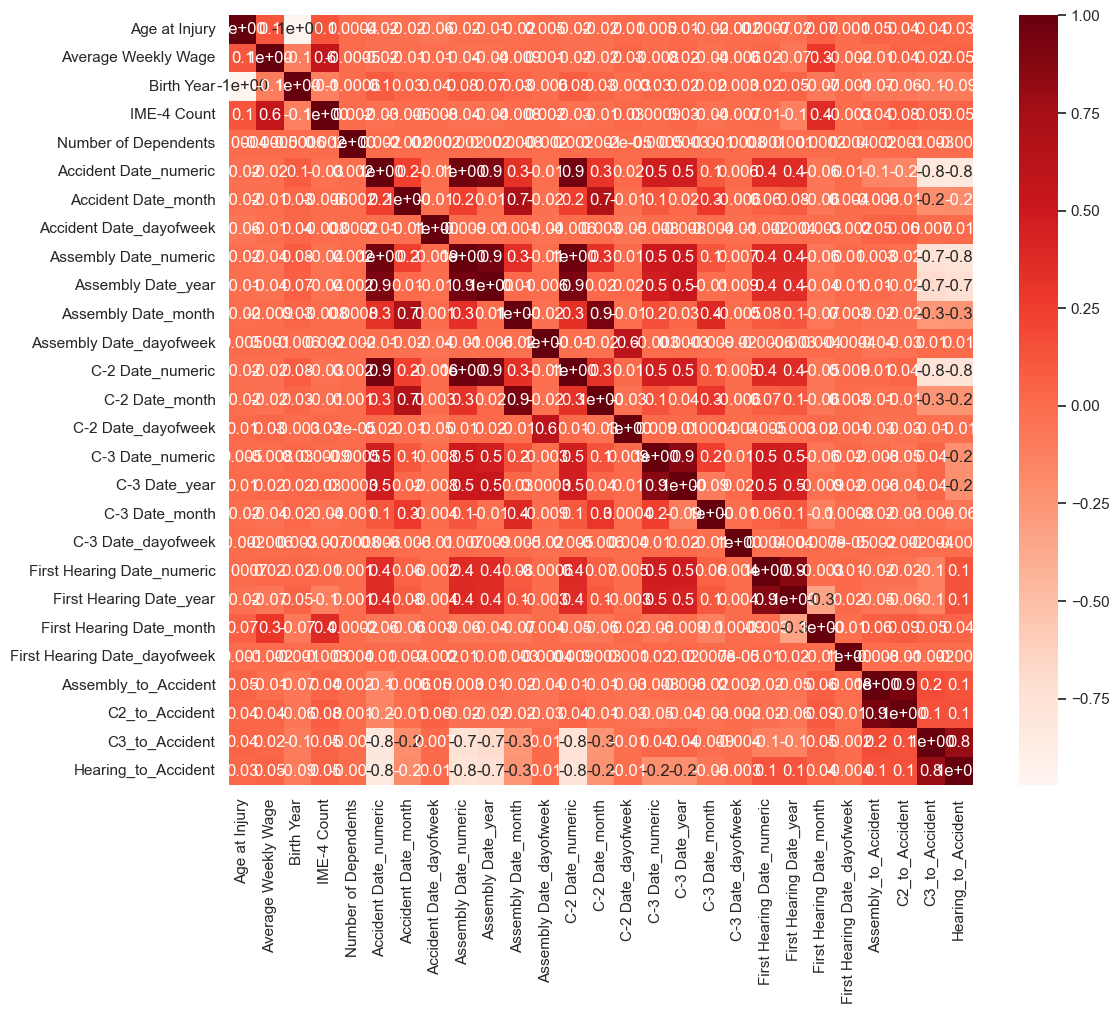

In [88]:
cor_heatmap(cor_spearman)

In [89]:
X_train_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_val_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_test_num_scaled.drop('Birth Year', axis=1, inplace=True)

X_train_num_scaled.drop('Assembly Date_month', axis=1, inplace=True)
X_val_num_scaled.drop('Assembly Date_month', axis=1, inplace=True)
X_test_num_scaled.drop('Assembly Date_month', axis=1, inplace=True)

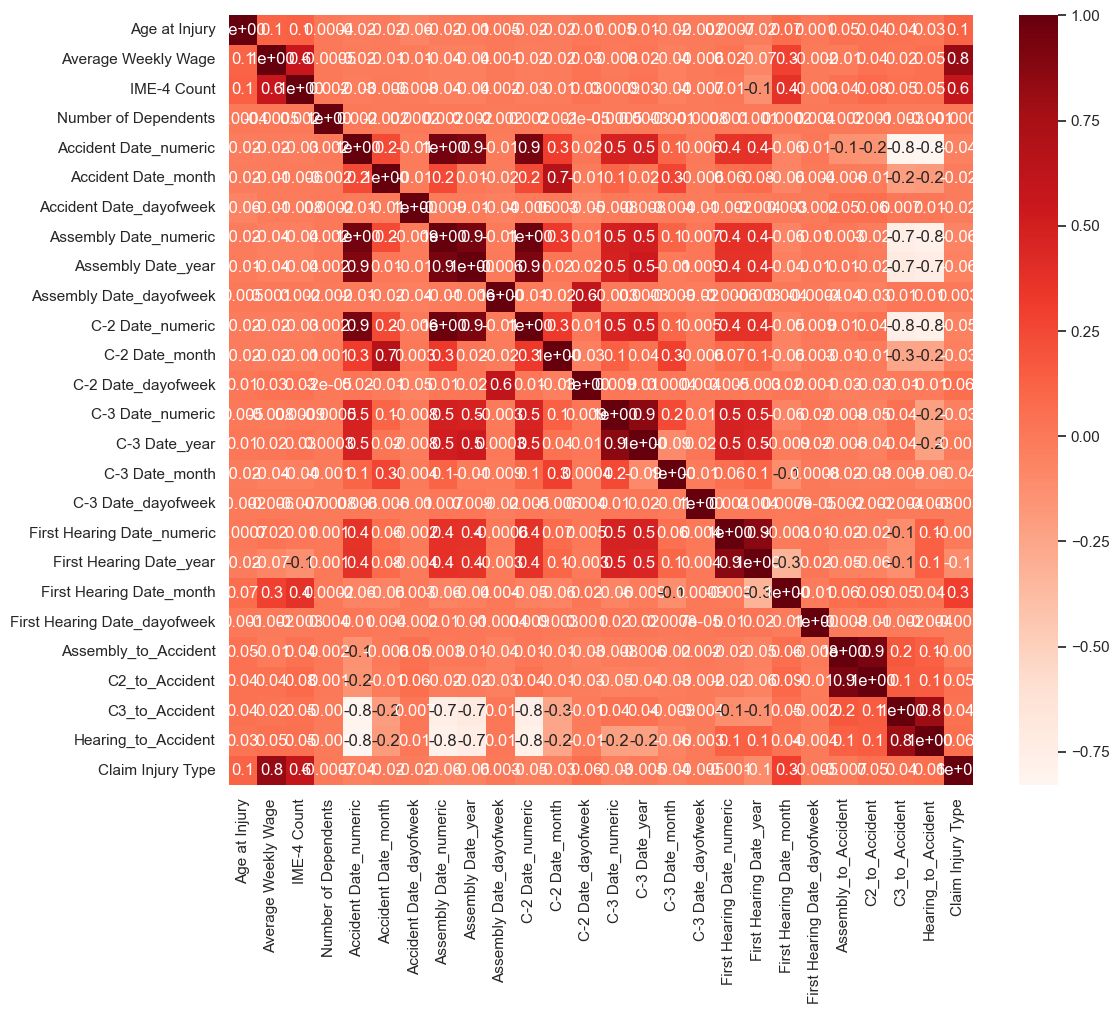

In [90]:
# If the shapes are compatible, combine the variables
X_train_num_scaled_y = X_train_num_scaled.copy()
X_train_num_scaled_y['Claim Injury Type'] = y_train

# Calculate Spearman correlation
cor_spearman_y = X_train_num_scaled_y.corr(method='spearman')

# Create correlation heatmap
cor_heatmap(cor_spearman_y)

In [91]:
X_train_num_scaled.drop(['Number of Dependents', 'Accident Date_dayofweek', 'Assembly Date_dayofweek', 'First Hearing Date_dayofweek'], axis=1, inplace=True)
X_val_num_scaled.drop(['Number of Dependents', 'Accident Date_dayofweek', 'Assembly Date_dayofweek', 'First Hearing Date_dayofweek'], axis=1, inplace=True)
X_test_num_scaled.drop(['Number of Dependents', 'Accident Date_dayofweek', 'Assembly Date_dayofweek', 'First Hearing Date_dayofweek'], axis=1, inplace=True)

In [96]:
y_train_series = pd.Series(y_train)

threshold = 0.5
relevant_features = []

for col in X_train_combined.columns:
    spearman_corr, _ = spearmanr(X_train_combined[col], y_train_series)
    if abs(spearman_corr) >= threshold:
        relevant_features.append(col)
        print(f"{col}: {spearman_corr:.4f}")

important_features_corr = X_train_combined[relevant_features]


Average Weekly Wage: 0.8239
IME-4 Count: 0.5971
Attorney/Representative: 0.5680


In [97]:
threshold = 0.0
n_classes = len(np.unique(y_train))

# Create a loop to calculate the correlation for each class
all_features = []

for i in range(n_classes):
    spearman_corr_dict = {}
    y_train_class = np.where(y_train == i, 1, 0)
    
    for col in X_train_combined.columns:
        spearman_corr, _ = spearmanr(X_train_combined[col], y_train_class)
        spearman_corr_dict[col] = abs(spearman_corr)
    
    # Get the top 10 most correlated features
    top_10_features = sorted(spearman_corr_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # Extract the feature names
    feature_names = [feature[0] for feature in top_10_features]
    
    # Add the feature names to the list
    all_features.extend(feature_names)

# Remove duplicates by converting to a set and then back to a list
all_features = list(set(all_features))

# Create a new dataframe with the selected features
X_train_selected = X_train_combined[all_features]
C = X_val_combined[all_features]
X_test_selected = X_test_combined[all_features]
print(X_train_selected.columns)

Index(['Average Weekly Wage', 'C-3 Date_numeric', 'First Hearing Date_year',
       'Carrier Name', 'WCIO Cause of Injury Code', 'C2_to_Accident',
       'C-2 Date_numeric', 'WCIO Nature of Injury Code',
       'WCIO Part Of Body Code', 'IME-4 Count', 'Assembly Date_year',
       'C-2 Date_dayofweek', 'WCIO Nature of Injury Description',
       'COVID-19 Indicator', 'Age at Injury',
       'WCIO Cause of Injury Description', 'C-3 Date_year',
       'Hearing_to_Accident', 'Assembly Date_numeric', 'Industry Code',
       'Accident Date_numeric', 'First Hearing Date_month',
       'WCIO Part Of Body Description', 'First Hearing Date_numeric',
       'Attorney/Representative', 'Assembly_to_Accident'],
      dtype='object')


<hr>
<a class="anchor" id="chisquare">
    
## 5.2 Chi-Square
    
</a>

In [92]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

for var in X_train_cat_df:
    TestIndependence(X_train_cat_df[var],y_train, var)

In [94]:
X_train_combined = pd.concat([X_train_num_scaled, X_train_cat_df], axis=1)
X_val_combined = pd.concat([X_val_num_scaled, X_val_cat_df], axis=1)
X_test_combined = pd.concat([X_test_num_scaled, X_test_cat_df], axis=1)

In [95]:
X_train_num_scaled.shape, X_train_cat_df.shape, X_train_combined.shape

((397362, 21), (397362, 18), (397362, 39))

<hr>
<a class="anchor" id="lassocv">
    
## 5.3 LassoCV
    
</a>

In [98]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [99]:
reg = LassoCV()
reg.fit(X_train_combined, y_train)
coef = pd.Series(reg.coef_, index = X_train_combined.columns)
coef

Age at Injury                        0.000000
Average Weekly Wage                  1.981760
IME-4 Count                          0.000000
Accident Date_numeric               -0.000000
Accident Date_month                 -0.000000
Assembly Date_numeric               -0.000000
Assembly Date_year                  -0.000000
C-2 Date_numeric                    -0.000000
C-2 Date_month                      -0.000000
C-2 Date_dayofweek                   0.000000
C-3 Date_numeric                    -0.000000
C-3 Date_year                       -0.000000
C-3 Date_month                      -0.000000
C-3 Date_dayofweek                   0.000000
First Hearing Date_numeric          -0.000000
First Hearing Date_year             -0.000000
First Hearing Date_month             0.000000
Assembly_to_Accident                 0.000000
C2_to_Accident                       0.000000
C3_to_Accident                       0.000000
Hearing_to_Accident                  0.000000
Alternative Dispute Resolution    

In [100]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 28 variables


In [101]:
coef.sort_values()

Medical Fee Region                  -0.006975
WCIO Nature of Injury Code          -0.004381
WCIO Cause of Injury Code           -0.004040
Industry Code                       -0.002834
WCIO Part Of Body Description       -0.000978
WCIO Part Of Body Code              -0.000441
County of Injury                    -0.000340
Age at Injury                        0.000000
Hearing_to_Accident                  0.000000
Alternative Dispute Resolution      -0.000000
Carrier Type                        -0.000000
Gender                               0.000000
District Name                        0.000000
Industry Code Description           -0.000000
WCIO Cause of Injury Description     0.000000
COVID-19 Indicator                  -0.000000
C2_to_Accident                       0.000000
C3_to_Accident                       0.000000
First Hearing Date_month             0.000000
IME-4 Count                          0.000000
Accident Date_numeric               -0.000000
Accident Date_month               

In [102]:
columns_to_keep = coef[coef != 0].index
columns_to_keep

Index(['Average Weekly Wage', 'Attorney/Representative', 'Carrier Name',
       'County of Injury', 'Industry Code', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description'],
      dtype='object')

we decide to keep IME-4 Count due to his correlation with the target variable

In [ ]:
features_selected = columns_to_keep + 'IME-4 Count'

TypeError: cannot concatenate object of type '<class 'pandas.core.indexes.base.Index'>'; only Series and DataFrame objs are valid

In [ ]:
X_train_combined_important_features = X_train_combined[features_selected]
X_test_combined_important_features = X_test_combined[features_selected]
X_val_combined_important_features = X_val_combined[features_selected]
X_train_combined_important_features

<hr>
<a class="anchor" id="balancingdata">
    
## 5.4 Balancing Data
    
</a>

In [ ]:
def custom_sampling_strategy(y):
    class_counts = np.bincount(y)
    max_count = np.max(class_counts)
    sampling_strategy = {}
    for i, count in enumerate(class_counts):
        if count > 1000:  # majority class
            sampling_strategy[i] = count
        else:
            sampling_strategy[i] = max_count
    return sampling_strategy

adasyn = ADASYN(random_state=42, sampling_strategy=custom_sampling_strategy)
X_train_balanced, y_train_balanced = adasyn.fit_resample(X_train_combined_important_features, y_train)

<hr>
<a class="anchor" id="simplemodel">
    
# 6. Build a simple model and assess the performance
    
</a>

<hr>
<a class="anchor" id="creating">
    
# 6.1 Creating the model
    
</a> 

In [ ]:
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
#loo = LeaveOneOut()

In [ ]:
""" 
print("GaussianNB:")
model = GaussianNB()

print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Average Accuracy (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (K-Fold): {kfold_scores.std():.2f}")

print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Average Accuracy (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

model.fit(X_train_num_scaled, y_train)

y_pred = model.predict(X_val_num_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Set Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

"""

In [ ]:
""" 
print("DecisionTreeClassifier:")
model = DecisionTreeClassifier()

print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_combined_lasso, y_train, cv=kfold, scoring='accuracy')
print(f"Average Accuracy (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (K-Fold): {kfold_scores.std():.2f}")

print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_combined_lasso, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Average Accuracy (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

model.fit(X_train_combined, y_train)

y_pred = model.predict(X_val_combined)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Set Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))

"""

In [ ]:
""" 
print("KNeighborsClassifier:")
model = KNeighborsClassifier(n_neighbors=5)

print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Average Accuracy (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (K-Fold): {kfold_scores.std():.2f}")

print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Average Accuracy (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

model.fit(X_train_combined, y_train)

y_pred = model.predict(X_val_combined)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Set Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))
"""

In [ ]:
""" 
print("LogisticRegression:")
model = LogisticRegression(class_weight='balanced')

print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Average Accuracy (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (K-Fold): {kfold_scores.std():.2f}")

print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Average Accuracy (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

model.fit(X_train_num_scaled, y_train)

y_pred = model.predict(X_val_num_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Set Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))
"""

In [ ]:
""" 
print("SVC:")
model = SVC(class_weight='balanced')

print("K-Fold Cross Validation:")
kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=kfold, scoring='accuracy')
print(f"Average Accuracy (K-Fold): {kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (K-Fold): {kfold_scores.std():.2f}")

print("\nRepeated K-Fold Cross Validation:")
repeated_kfold_scores = cross_val_score(model, X_train_num_scaled, y_train, cv=repeated_kfold, scoring='accuracy')
print(f"Average Accuracy (Repeated K-Fold): {repeated_kfold_scores.mean() * 100:.2f}%")
print(f"Standard Deviation (Repeated K-Fold): {repeated_kfold_scores.std():.2f}")

model.fit(X_train_num_scaled, y_train)

y_pred = model.predict(X_val_num_scaled)

accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Set Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_val, y_pred))
"""

In [105]:
def train_model(X_train, y_train, model_type='xgb', random_state=42):
    """Train model with multiple options"""
    print(f"\nTraining {model_type} model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    if model_type == 'xgb':
        model = XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=random_state,
            n_jobs=2,
            tree_method='hist',
            enable_categorical=True,
            objective='multi:softprob',
            num_class=8,
            eval_metric=['mlogloss', 'merror'],
            use_label_encoder=False
        )
        
        # Train with early stopping
        eval_set = [(X_train, y_train)]
        model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=True
        )
        
    elif model_type == 'hist_gb':
        model = HistGradientBoostingClassifier(
            max_iter=100,
            learning_rate=0.1,
            max_depth=None,
            random_state=random_state,
            verbose=1
        )
        model.fit(X_train, y_train)
        
    elif model_type == 'simple_rf':
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=random_state,
            n_jobs=2,
            verbose=1,
            class_weight='balanced'
        )
        model.fit(X_train, y_train)
        
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    return model

In [ ]:
model = train_model(X_train_balanced, y_train_balanced)


Training xgb model...
Starting training with 39 features...


C:\Users\HP\anaconda3.1\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:56:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.84349	validation_0-merror:0.22514
[1]	validation_0-mlogloss:1.67251	validation_0-merror:0.22332
[2]	validation_0-mlogloss:1.53911	validation_0-merror:0.22301
[3]	validation_0-mlogloss:1.43046	validation_0-merror:0.22257
[4]	validation_0-mlogloss:1.33972	validation_0-merror:0.22233
[5]	validation_0-mlogloss:1.26261	validation_0-merror:0.22160
[6]	validation_0-mlogloss:1.19560	validation_0-merror:0.22088
[7]	validation_0-mlogloss:1.13733	validation_0-merror:0.22068
[8]	validation_0-mlogloss:1.08619	validation_0-merror:0.22009
[9]	validation_0-mlogloss:1.04112	validation_0-merror:0.21976
[10]	validation_0-mlogloss:1.00093	validation_0-merror:0.21909
[11]	validation_0-mlogloss:0.96525	validation_0-merror:0.21872
[12]	validation_0-mlogloss:0.93342	validation_0-merror:0.21860
[13]	validation_0-mlogloss:0.90439	validation_0-merror:0.21802
[14]	validation_0-mlogloss:0.87851	validation_0-merror:0.21773
[15]	validation_0-mlogloss:0.85482	validation_0-merror:0.21732
[1

In [ ]:
print(model.score(X_train_balanced, y_train_balanced))
print(model.score(X_val_combined_important_features, y_val))

0.7972654657465988
0.7929641395428041


<hr>
<a class="anchor" id="evaluate">
    
# 6.2 Evaluate the model
    
</a> 

In [ ]:
def evaluate_model(model, X_val, y_val, X_test=None):
    y_val_pred = model.predict(X_val)
    
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'f1_macro': f1_score(y_val, y_val_pred, average='macro')
    }
    
    print("\nValidation Results:")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    print("\nMetrics:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    test_pred = None
    if X_test is not None:
        test_pred = model.predict(X_test)
    
    return val_metrics, test_pred
    
val_metrics, test_pred = evaluate_model(model, X_val_combined_important_features, y_val, X_test_combined_important_features)


Validation Results:

Classification Report:


C:\Users\HP\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3.1\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.73      0.49      0.59      3733
           1       0.85      0.98      0.91     87244
           2       0.53      0.07      0.12     20395
           3       0.72      0.88      0.79     43574
           4       0.70      0.58      0.63     13954
           5       0.50      0.00      0.00      1234
           6       0.00      0.00      0.00        28
           7       0.67      0.29      0.41       137

    accuracy                           0.79    170299
   macro avg       0.59      0.41      0.43    170299
weighted avg       0.76      0.79      0.75    170299


Metrics:
accuracy: 0.7930
f1_macro: 0.4318


<hr>
<a class="anchor" id="export">
    
# 6.3 Export the predictor
    
</a> 

In [ ]:
CLAIM_TYPE_MAPPING = {
    1: '1. CANCELLED',
    2: '2. NON-COMP',
    3: '3. MED ONLY',
    4: '4. TEMPORARY',
    5: '5. PPD SCH LOSS',
    6: '6. PPD NSL',
    7: '7. PTD',
    8: '8. DEATH'
    }

def create_submission_df(predictions, test_df):
    # Add 1 to predictions to convert back to original scale (0-7 to 1-8)
    numeric_predictions = predictions + 1
    
    # Map numeric predictions to claim type strings
    claim_types = [CLAIM_TYPE_MAPPING[pred] for pred in numeric_predictions]
    
    # Create submission dataframe using original (unscaled) claim identifiers
    submission = pd.DataFrame({
        'Claim Identifier': test_df['Claim Identifier'].astype(int),  # Original claim IDs
        'Claim Injury Type': claim_types  # Full claim type names
    })
    
    return submission

In [ ]:
def save_submission(submission_df, experiment_name):
    filename = f'submission_{experiment_name}.csv'
    submission_df.to_csv(filename, index=False)
    print(f"\nSubmission saved to {filename}")
    
    # Display sample of submission
    print("\nSubmission sample:")
    print(submission_df.head())
    print("\nValue counts:")
    print(submission_df['Claim Injury Type'].value_counts())

In [ ]:
model_1 = 'Model new'
original_claim_ids = X_test_combined.index.copy()
submission_df = create_submission_df(test_pred, pd.DataFrame({'Claim Identifier': original_claim_ids}))
save_submission(submission_df, model_1)